# Matplotlib Overview

Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/

## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    pip install matplotlib
    
## Importing

Import the `matplotlib.pyplot` module under the name `plt` (the tidy way):
import matplotlib.pyplot as plt

You'll also need to use this line to see plots in the notebook:
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline # only for jupyter notebooks, if you are using another editor, you'll use: plt.show() at the end of all your plotting commands to have the figure pop up in another window.


UsageError: unrecognized arguments: # only for jupyter notebooks, if you are using another editor, you'll use: plt.show() at the end of all your plotting commands to have the figure pop up in another window.


# Basic Example

Let's walk through a very simple example using two numpy arrays:

In [2]:
# ** The data we want to plot:**

import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

print("x.shape: ", x.shape)
print("x: ", x)
print("y: ", y)


x.shape:  (11,)
x:  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
y:  [ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25 25.  ]


Basic Matplotlib Commands

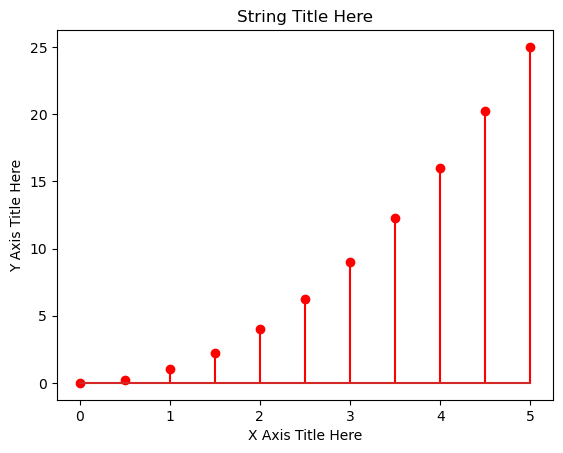

In [4]:
# create a very simple line plot

plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

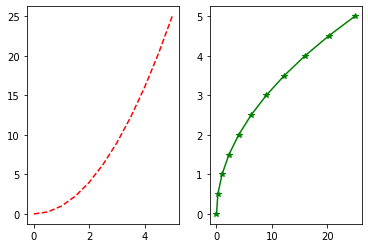

In [8]:
# Creating Multiplots on Same Canvas

# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

___
# Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

Text(0.5, 1.0, 'Set Title')

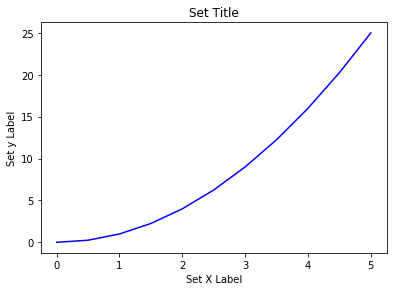

In [10]:
# To begin we create a figure instance. Then we can add axes to that figure:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

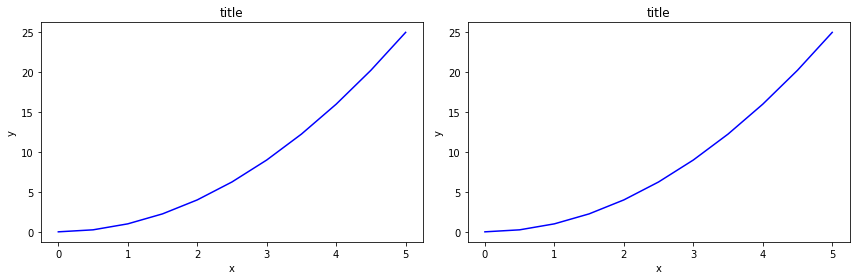

In [18]:
# Empty canvas of 1 by 2 subplots
#fig, axes = plt.subplots(figsize=(12,3))
fig, axes = plt.subplots(figsize=(12,4), nrows=1, ncols=2) # Axes is an array of axes to plot on

for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

plt.tight_layout() # A common issue with matplolib is overlapping subplots or figures. We ca use fig.tight_layout() or plt.tight_layout() method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

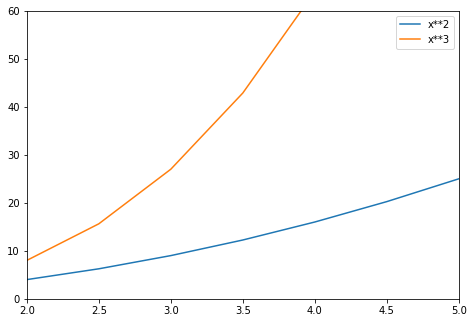

In [12]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")

# ax.set_ylim([0, 60])
# ax.set_xlim([2, 5])

ax.legend()

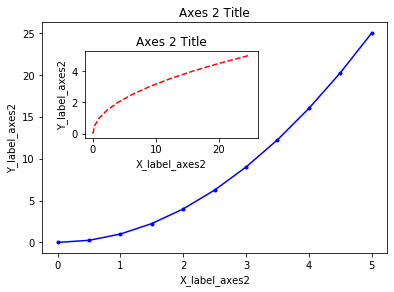

In [20]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b.-')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r--')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

In [19]:
# To save a figure to a file we can use the savefig method in the Figure class:
fig.savefig("filename.png") 

# Special Plot Types

There are many specialized plots we can create, such as barplots, histograms, scatter plots, and much more. Most of these type of plots we will actually create using seaborn, a statistical plotting library for Python. But here are a few examples of these type of plots:

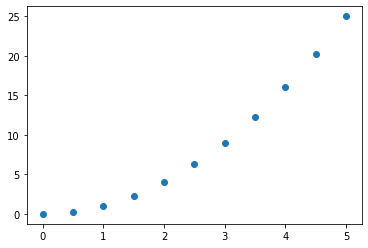

In [21]:
plt.scatter(x,y)

(array([10., 14.,  8.,  8.,  7., 13., 14.,  5., 11., 10.]),
 array([  4. , 103.3, 202.6, 301.9, 401.2, 500.5, 599.8, 699.1, 798.4,
        897.7, 997. ]),
 <a list of 10 Patch objects>)

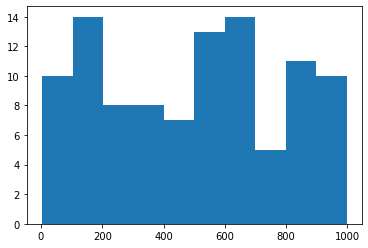

In [22]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

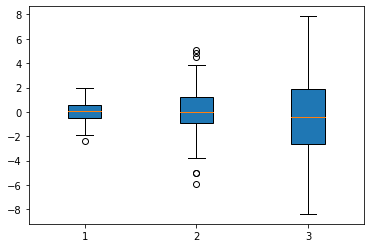

In [23]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

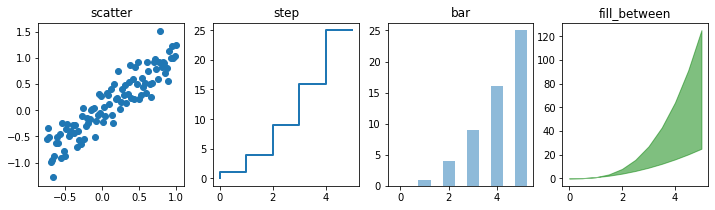

In [27]:
# In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

Annotating text in matplotlib figures can be done using the text function. It supports LaTeX formatting just like axis label texts and titles:

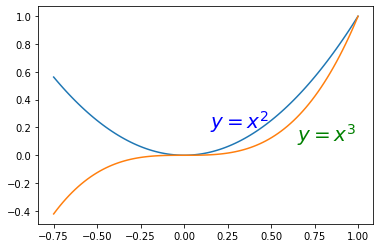

In [28]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

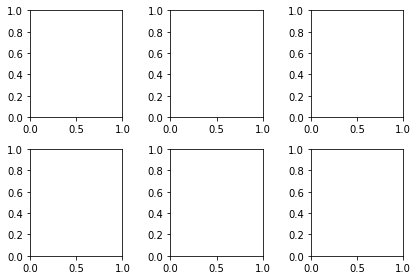

In [29]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

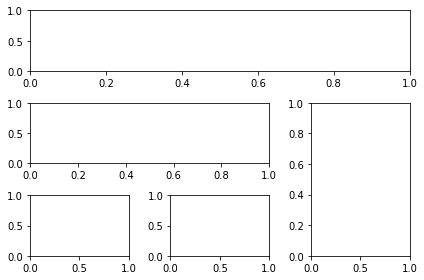

In [30]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()